In [50]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

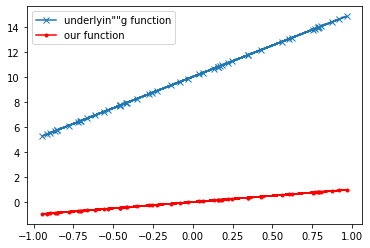

In [51]:
class Linear:
  def __init__(self, input_dim, num_hidden = 1):
    self.weights = np.random.randn(input_dim, num_hidden)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    return x @ self.weights + self.bias


d = 1 #dim
n = 50 # 값 n 개, 1차원 벡터 생성
x = np.random.uniform(-1, 1, (n, d)) #50, 1(vector), -1 ~ 1사이의 정규분포 값

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])
y_true = x @ weights_true + bias_true

linear = Linear(input_dim = d)
y_pred = linear(x)

plt.plot(x, y_true, marker = 'x', label = 'underlyin""g function')
plt.plot(x, y_pred, color = 'r', marker ='.', label="our function")
plt.legend()

In [52]:
#define loss function
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'our init loss is  {loss(y_pred, y_true)}')

our init loss is  101.69169102933256


In [53]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0] #(50, 1)
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient

loss = MSE()
loss(y_pred, y_true)
loss.backward().sum(axis = 0)

array([-19.60857168])

In [54]:
#loss, back prob
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]#(50, 1)
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient

class Linear:
  def __init__(self, input_dim : int, num_hidden = 1):
    self.weights = np.random.randn(input_dim ,num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis = 0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient


In [55]:
loss = MSE() #loss function 정의
linear = Linear(d)
y_pred = linear(x)
print(f'loss : {loss(y_pred, y_true)}')
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1) # lr = 0.1
y_pred = linear(x)
print(f'1 step update : {loss(y_pred, y_true)}')

loss : 106.28534585452428
1 step update : 71.31468649009095


Epoch 0, loss 104.67127713117272
Epoch 5, loss 69.73799125146225
Epoch 10, loss 47.03647819270731
Epoch 15, loss 32.20061147224714
Epoch 20, loss 22.434269064700814
Epoch 25, loss 15.94521572037993
Epoch 30, loss 11.583328722126339
Epoch 35, loss 8.609379813785878


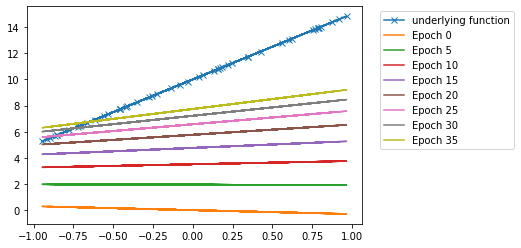

In [56]:
plt.plot(x, y_true, marker = 'x', label ='underlying function')
loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 ==0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label = f'Epoch {epoch}')

    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

In [57]:
print(y_pred.shape, y_pred.squeeze().shape)

(50, 1) (50,)


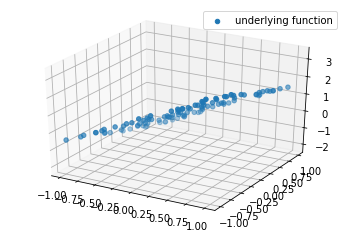

In [58]:
n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
y_true = x @ weights_true + bias_true

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

2.7343929845865738


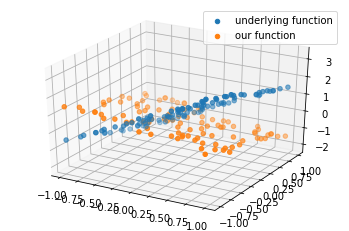

In [59]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch : 0, loss : 2.7343929845865738
Epoch : 1, loss : 2.285287378587364
Epoch : 2, loss : 1.9257237493926342
Epoch : 3, loss : 1.6331760673991864
Epoch : 4, loss : 1.3919271898914776
Epoch : 5, loss : 1.1907893191344054
Epoch : 6, loss : 1.0216233959332646
Epoch : 7, loss : 0.8783721957814735
Epoch : 8, loss : 0.75642445617537
Epoch : 9, loss : 0.6521929470869969
Epoch : 10, loss : 0.5628313478266541
Epoch : 11, loss : 0.48604163991424065
Epoch : 12, loss : 0.41994091587386156
Epoch : 13, loss : 0.36296751992231746
Epoch : 14, loss : 0.31381350349047704
Epoch : 15, loss : 0.2713749185898119
Epoch : 16, loss : 0.23471439434084534
Epoch : 17, loss : 0.20303232778952707
Epoch : 18, loss : 0.17564424120851946
Epoch : 19, loss : 0.15196265226276312


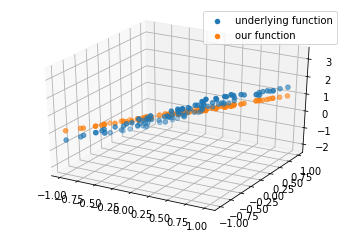

In [60]:
from typing import Callable

def fit(x , y, model, loss, lr, num_epochs):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch : {epoch}, loss : {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model = linear, loss = loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

In [61]:
class ReLU:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

relu = ReLU()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


2.0932829120282657


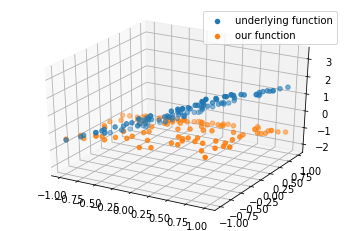

In [62]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = ReLU()
    self.linear2 = Linear(num_hidden, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

Epoch : 0, loss : 2.0932829120282657
Epoch : 1, loss : 0.7723113344718214
Epoch : 2, loss : 0.43438512689002734
Epoch : 3, loss : 0.26083363226868106
Epoch : 4, loss : 0.15616791310381922
Epoch : 5, loss : 0.09297779255055484
Epoch : 6, loss : 0.05650706477743161
Epoch : 7, loss : 0.036017378381374
Epoch : 8, loss : 0.02482421402296985
Epoch : 9, loss : 0.018755577180163616
Epoch : 10, loss : 0.015422627730888405
Epoch : 11, loss : 0.013543845457226948
Epoch : 12, loss : 0.012427460776617645
Epoch : 13, loss : 0.01171367929282358
Epoch : 14, loss : 0.011217393443977179
Epoch : 15, loss : 0.010843519432634459
Epoch : 16, loss : 0.010542605519850952
Epoch : 17, loss : 0.010288351805238844
Epoch : 18, loss : 0.010064323753763964
Epoch : 19, loss : 0.009860342800397187
Epoch : 20, loss : 0.00967600842725845
Epoch : 21, loss : 0.009507922046862308
Epoch : 22, loss : 0.00935356452653182
Epoch : 23, loss : 0.00921096577273011
Epoch : 24, loss : 0.009078525794405563
Epoch : 25, loss : 0.008954

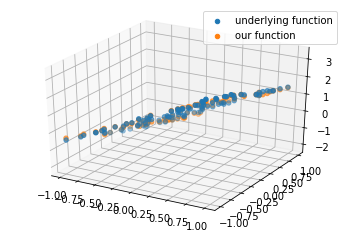

In [63]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

In [64]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

loss = nn.MSELoss()
model = TorchModel(input_dim = d, num_hidden = 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(1.8611, grad_fn=<MseLossBackward>)


In [65]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(1.8611, grad_fn=<MseLossBackward>)
tensor(1.7496, grad_fn=<MseLossBackward>)


tensor(1.7496, grad_fn=<MseLossBackward>)
tensor(1.6616, grad_fn=<MseLossBackward>)
tensor(1.5812, grad_fn=<MseLossBackward>)
tensor(1.5050, grad_fn=<MseLossBackward>)
tensor(1.4267, grad_fn=<MseLossBackward>)
tensor(1.3440, grad_fn=<MseLossBackward>)
tensor(1.2554, grad_fn=<MseLossBackward>)
tensor(1.1627, grad_fn=<MseLossBackward>)
tensor(1.0654, grad_fn=<MseLossBackward>)
tensor(0.9645, grad_fn=<MseLossBackward>)
tensor(0.8622, grad_fn=<MseLossBackward>)
tensor(0.7599, grad_fn=<MseLossBackward>)
tensor(0.6588, grad_fn=<MseLossBackward>)
tensor(0.5618, grad_fn=<MseLossBackward>)
tensor(0.4731, grad_fn=<MseLossBackward>)
tensor(0.3924, grad_fn=<MseLossBackward>)
tensor(0.3215, grad_fn=<MseLossBackward>)
tensor(0.2606, grad_fn=<MseLossBackward>)
tensor(0.2083, grad_fn=<MseLossBackward>)
tensor(0.1646, grad_fn=<MseLossBackward>)
tensor(0.1295, grad_fn=<MseLossBackward>)
tensor(0.1023, grad_fn=<MseLossBackward>)
tensor(0.0816, grad_fn=<MseLossBackward>)
tensor(0.0661, grad_fn=<MseLossBac

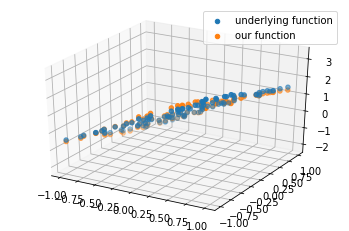

In [66]:
def torch_fit(x, y, model, loss, lr, num_epochs):
  optim=torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model, loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())